# BIG DATA PROJECT

## import

In [1]:
# Data handling and manipulation library
import pandas as pd
import random
# Data visualization library based on matplotlib
import seaborn as sns
# Basic plotting library in Python
import matplotlib.pyplot as plt
# Cross-validation function to evaluate model performance
from sklearn.model_selection import cross_val_score
# Library for numerical operations in Python
import numpy as np
# Preprocessing tool to standardize features (mean=0, variance=1)
from sklearn.preprocessing import StandardScaler
# Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
# Visualization tool for the elbow method to determine the optimal number of clusters
# Calculates the Silhouette Score which measures the quality of clusters
from sklearn.metrics import silhouette_score
# KMeans clustering algorithm
from sklearn.cluster import KMeans
# Library for interactive plotting 

# k-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
# Splits data into random train and test subsets
from sklearn.model_selection import train_test_split
# Generates a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df_descr = pd.read_csv('data_descriptives.csv')
df_conv = pd.read_csv('data_conversations.csv')
df_meta = pd.read_csv('data_metadata.csv')

## Start clean

In [3]:
columns_to_drop = [
    'activity_1', 'activity_2', 'activity_3', 'activity_4', 'activity_5',
    'hometown', 'has-children', 'living-alone', 'coach_name', 'session',
    'session_type', 'circumstances', 'client_name', 'activity_data',
    'num_children', 'weight_unit', 'height_unit', 'condition',
    'emotional_eating_issues', 'goal_completion', 'diagnosis', 'unit', 'systolic','diastolic',
    'status', 'diabetes_status','diabetic_status' , 'responses', 'value', 'name', 'patient_id', 'patient_name', 'date_of_birth', 'drug_usage','activities'
]

# Drop the specified columns from the DataFrame
df_descr = df_descr.drop(columns_to_drop, axis=1)

In [4]:
# Define the possible values
possible_values = ["Low", "Moderate", "High"]

# Replace empty values in the "stress_level" column with random values
df_descr['stress_level'].fillna(random.choice(possible_values), inplace=True)

df_descr['living_alone'].fillna(True, inplace=True)


In [5]:
# Convert the 'gender' column to binary: Male as 1 and Female as 0
df_descr['gender'] = df_descr['gender'].map({'Male': 1, 'Female': 0})

# Use LabelEncoder to convert 'ethnicity' to numerical labels
labelencoder = LabelEncoder()
df_descr['ethnicity'] = labelencoder.fit_transform(df_descr['ethnicity'])

# Use LabelEncoder to convert 'country_of_birth' to numerical labels
df_descr['country_of_birth'] = labelencoder.fit_transform(df_descr['country_of_birth'])
df_descr['current_country_of_residence'] = labelencoder.fit_transform(df_descr['current_country_of_residence'])

# Convert 'smoking_status' to boolean and then to integer (True as 1 and False as 0)
df_descr['smoking_status'] = df_descr['smoking_status'].astype(bool)
df_descr['smoking_status'] = df_descr['smoking_status'].astype(int)

# Remove missing values in 'height' and remove ' cm' suffix, then convert to integer
df_descr.dropna(subset=['height'], inplace=True)
df_descr['height'] = df_descr['height'].str.replace(' cm', '')
df_descr['height'] = df_descr['height'].astype(int)

# Remove ' kg' suffix from 'weight' and convert to float
df_descr['weight'] = df_descr['weight'].str.replace(' kg', '')
df_descr['weight'] = df_descr['weight'].astype(float)

# Use LabelEncoder to convert other columns to numerical labels
# These columns include 'diet_type', 'specific_preferences', 'challenges', etc.
df_descr['diet_type'] = labelencoder.fit_transform(df_descr['diet_type'])
df_descr['specific_preferences'] = labelencoder.fit_transform(df_descr['specific_preferences'])
df_descr['challenges'] = labelencoder.fit_transform(df_descr['challenges'])
df_descr['mother'] = labelencoder.fit_transform(df_descr['mother'])
df_descr['father'] = labelencoder.fit_transform(df_descr['father'])
df_descr['current_city_of_residence'] = labelencoder.fit_transform(df_descr['current_city_of_residence'])
df_descr['state_name'] = labelencoder.fit_transform(df_descr['state_name'])
df_descr['state_code'] = labelencoder.fit_transform(df_descr['state_code'])
df_descr['housing_type'] = labelencoder.fit_transform(df_descr['housing_type'])
df_descr['housing_tenure'] = labelencoder.fit_transform(df_descr['housing_tenure'])
df_descr['marital_status'] = labelencoder.fit_transform(df_descr['marital_status'])
df_descr['sexual_orientation'] = labelencoder.fit_transform(df_descr['sexual_orientation'])
df_descr['average_blood_pressure'] = labelencoder.fit_transform(df_descr['average_blood_pressure'])



df_descr['average_blood_glucose'] = labelencoder.fit_transform(df_descr['average_blood_glucose'])
df_descr['average_fasting_glucose'] = labelencoder.fit_transform(df_descr['average_fasting_glucose'])
df_descr['id'] = labelencoder.fit_transform(df_descr['id'])
df_descr['has_children'] = labelencoder.fit_transform(df_descr['has_children'])




# Create dictionaries to map custom ordered categorical data to numerical values
alcohol_consumption_order = {'Low': 0, 'Moderate': 1}
stress_level_order = {"Low": 0.0, "Moderate": 0.5, "High": 1.0}
physical_activity_order = {'low': 0, 'Moderate': 1, 'High': 2}

# Map the ordered categorical data to numerical data using the created dictionaries
df_descr['alcohol_consumption'] = df_descr['alcohol_consumption'].map(alcohol_consumption_order)
df_descr['stress_level'] = df_descr['stress_level'].map(stress_level_order)
df_descr['physical_activity'] = df_descr['physical_activity'].map(physical_activity_order)

# replace NAN values in all non binary columns with mean
non_binary_cols = []
for col in df_descr.columns:
    unique_vals = df_descr[col].dropna().unique()
   


In [6]:
# Check for Missing Values
missing_values = df_descr.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
weight                             0
gender                             0
height                             0
age                                0
bmi                                2
country_of_birth                   0
current_country_of_residence       0
average_daily_step_count           0
average_sleep_duration             0
resting_heart_rate                 0
heart_rate_variability             0
average_blood_pressure             0
average_blood_glucose              0
average_fasting_glucose            0
diet_type                          0
specific_preferences               0
challenges                         0
mother                             0
father                             0
ethnicity                          0
current_city_of_residence          0
id                                 0
state_name                         0
state_code                         0
housing_type                       0
housing_tenure                     0
marital_status        

In [7]:
def convert_number(num):
    if num < 10:  # If it's a single-digit number
        return num
    else:
        return num / 10

# Apply the function to the column
df_descr['average_fasting_glucose'] = df_descr['average_fasting_glucose'].apply(convert_number)

print(df_descr['average_fasting_glucose'])

0       1.1
1       2.9
2       1.1
3       1.2
4       1.6
       ... 
1447    2.6
1448    2.2
1449    4.6
1450    2.4
1451    1.6
Name: average_fasting_glucose, Length: 1449, dtype: float64


In [8]:
# Replace empty values in the "number_of_children" column with 0
df_descr['number_of_children'].fillna(0, inplace=True)

# Delete rows with null values in the "physical_activity" column
df_descr.dropna(subset=['physical_activity'], inplace=True)

# Filter rows with empty 'bmi' values
rows_with_empty_bmi = df_descr[df_descr['bmi'].isnull()]

# Calculate BMI for each row and fill in the 'bmi' column
for index, row in rows_with_empty_bmi.iterrows():
    weight_kg = row['weight']  # Assuming weight is in kilograms
    height_m = row['height'] / 100  # Assuming height is in centimeters, so convert to meters
    bmi = weight_kg / (height_m**2)
    df_descr.at[index, 'bmi'] = bmi

In [9]:
df_descr['has_diabetes'] = df_descr['average_fasting_glucose'] >= 7

In [10]:
true_count = df_descr['has_diabetes'].value_counts().get(True, 0)
false_count = df_descr['has_diabetes'].value_counts().get(False, 0)

print(f"True count: {true_count}")
print(f"False count: {false_count}")


True count: 156
False count: 1276


In [11]:
df_descr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 1451
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weight                        1432 non-null   float64
 1   gender                        1432 non-null   int64  
 2   height                        1432 non-null   int64  
 3   age                           1432 non-null   int64  
 4   bmi                           1432 non-null   float64
 5   country_of_birth              1432 non-null   int64  
 6   current_country_of_residence  1432 non-null   int64  
 7   average_daily_step_count      1432 non-null   int64  
 8   average_sleep_duration        1432 non-null   float64
 9   resting_heart_rate            1432 non-null   int64  
 10  heart_rate_variability        1432 non-null   float64
 11  average_blood_pressure        1432 non-null   int64  
 12  average_blood_glucose         1432 non-null   int64  
 13  average_

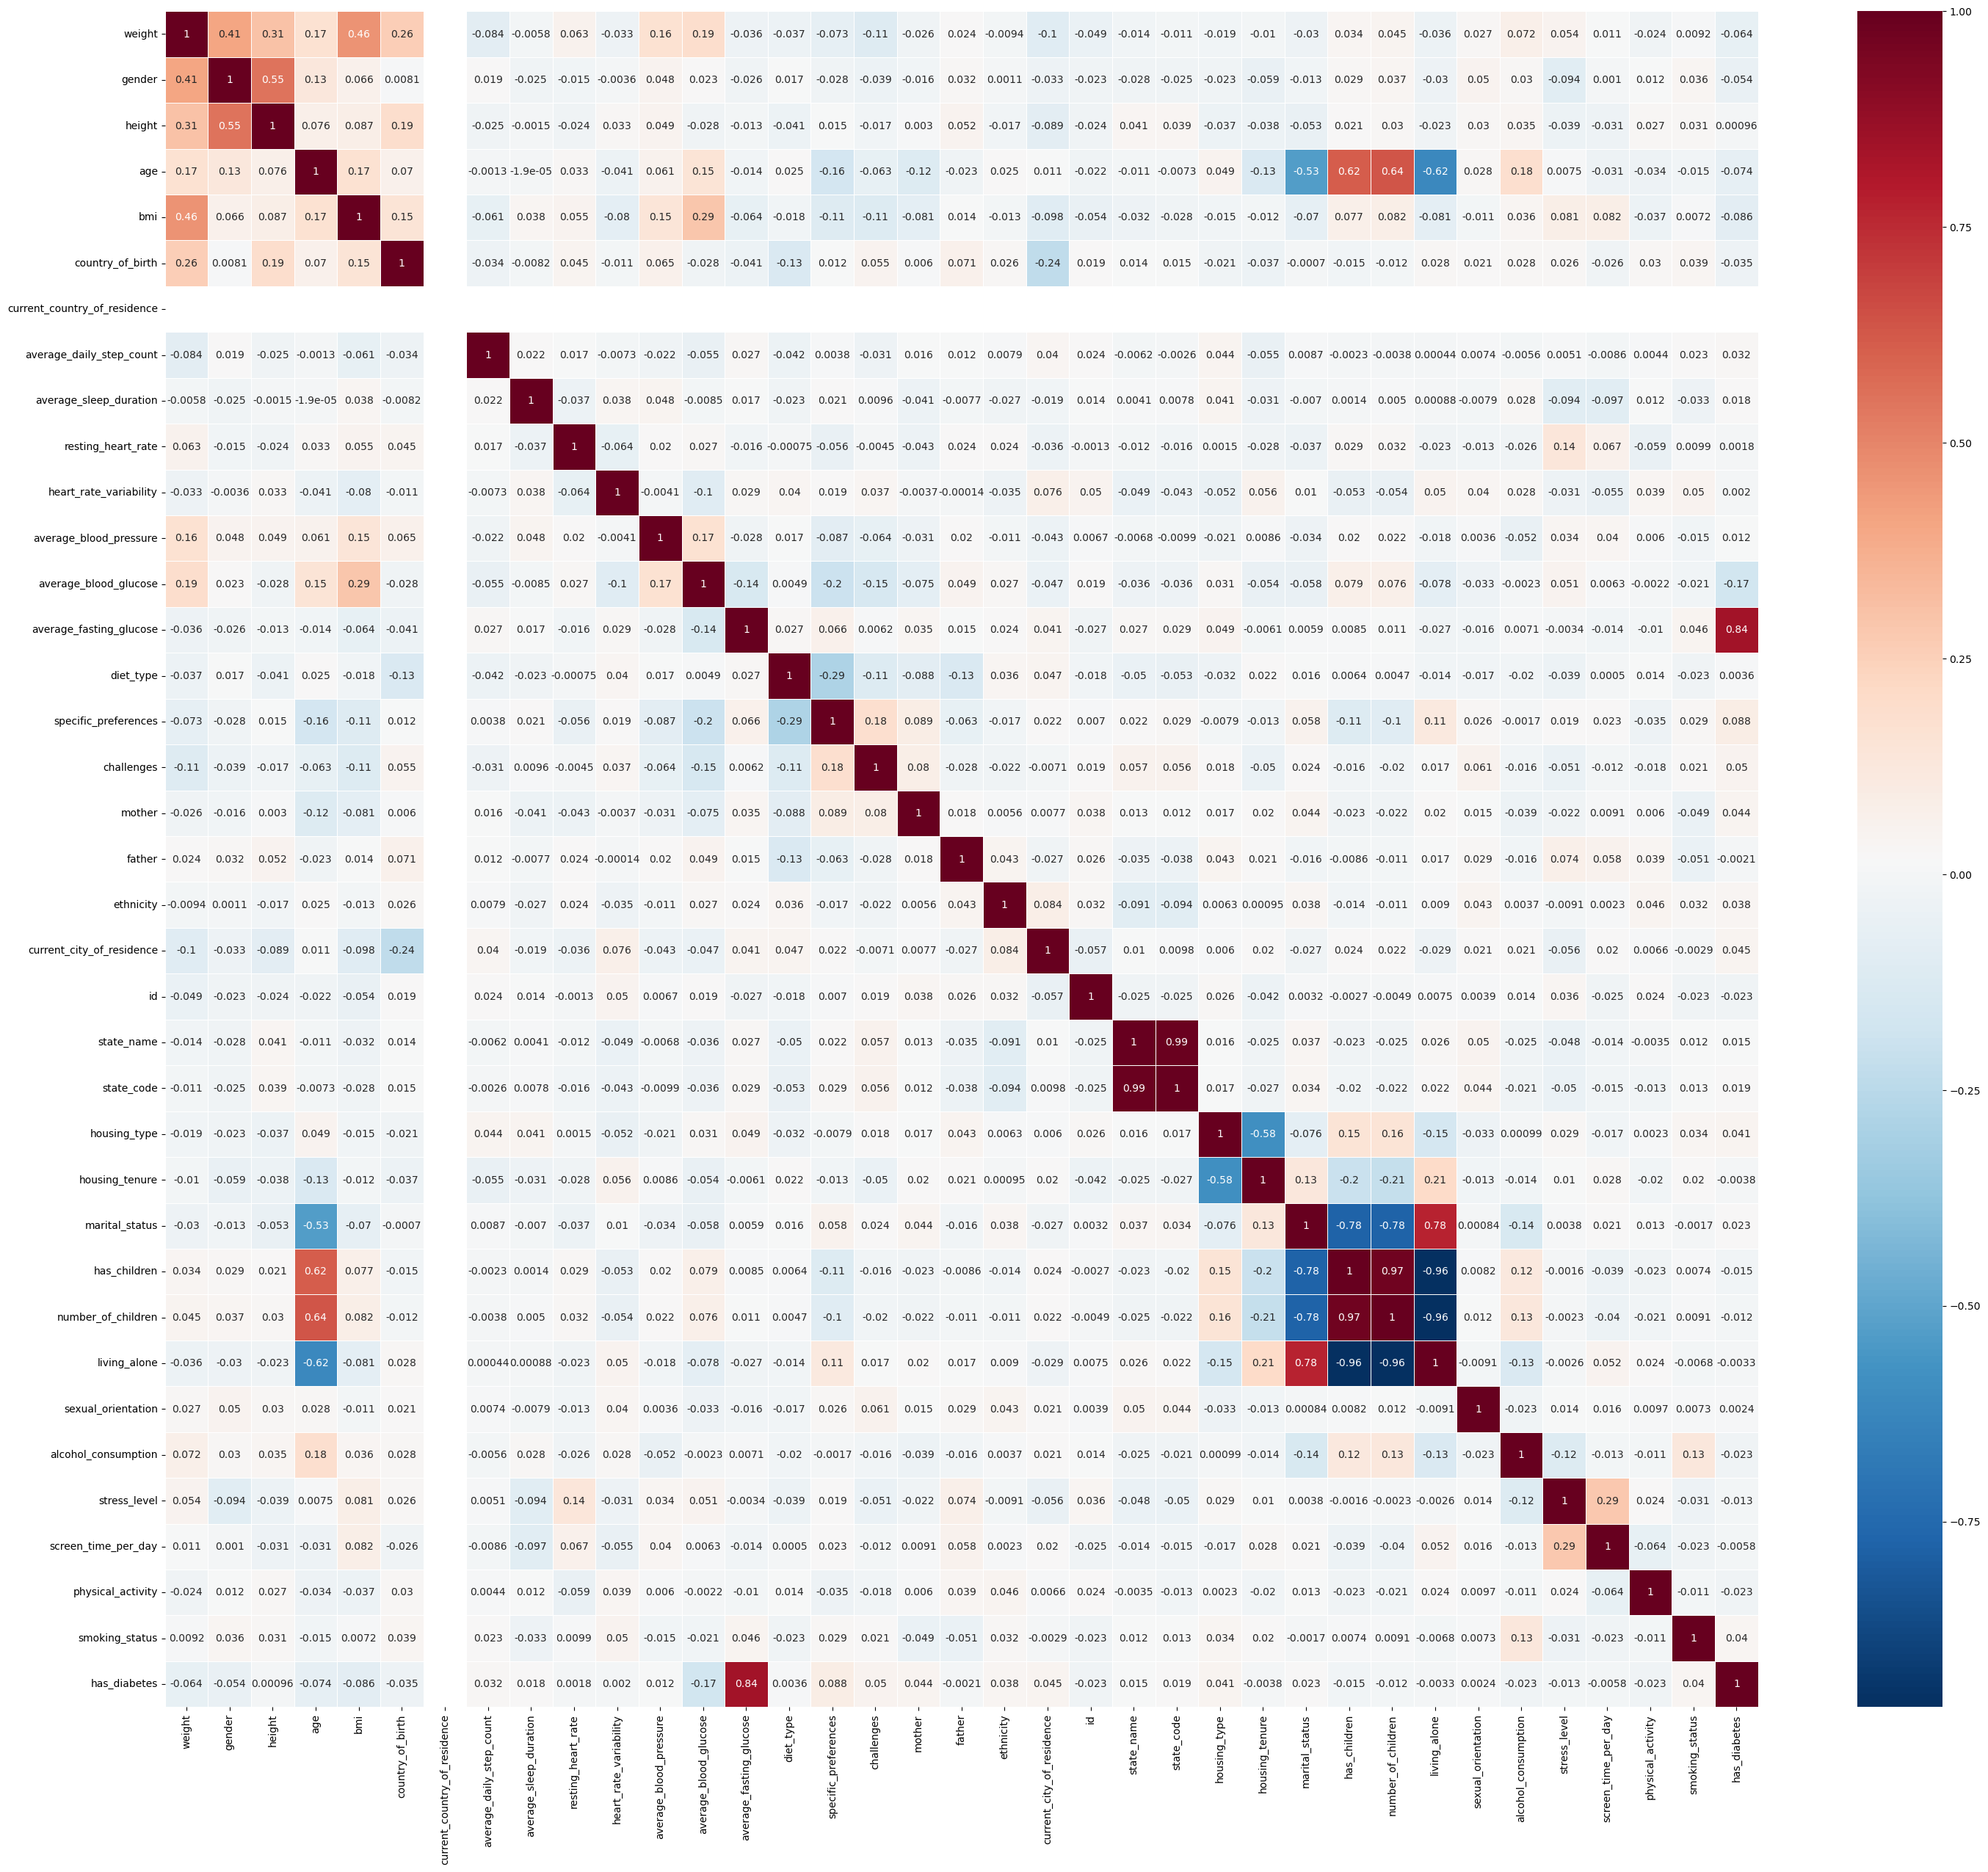

In [12]:
# Compute the pairwise Pearson correlation matrix for df.
# The Pearson correlation coefficient measures the linear relationship between two variables.
# Its value ranges from -1 to 1, where:
# - 1 implies a perfect positive linear relationship,
# - -1 implies a perfect negative linear relationship, and
# - 0 implies no linear relationship.
corr = df_descr.corr(method='pearson')

# Create a new figure and axis with a specified size.
# Adjust the figsize values to change the size of each cell in the heatmap.
fig, ax = plt.subplots(figsize=(35, 30))

# Create a heatmap using Seaborn.
# - `corr`: The computed correlation matrix.
# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

# Display the plot.
plt.show()


In [13]:
# Count the number of rows with at least one null value
rows_with_null = df_descr.isnull().any(axis=1).sum()

# Now, you can print or analyze the count as needed
print("Number of rows with at least one null value:", rows_with_null)


Number of rows with at least one null value: 0


In [14]:
# Save the DataFrame to a CSV file
df_descr.to_csv('descriptives_cleaned.csv', index=False)


# Model fun

In [15]:
df_descr_clean = pd.read_csv('descriptives_cleaned.csv')

# PCA

In [17]:
# Explore the data (e.g., summary statistics)
print(df_descr_clean.describe())

# Visualize the data (e.g., histograms, scatter plots)
sns.pairplot(df_descr_clean, hue="has_diabetes")
plt.show()

            weight       gender       height          age          bmi  \
count  1432.000000  1432.000000  1432.000000  1432.000000  1432.000000   
mean     61.702325     0.461592   157.131983    24.312151    24.268227   
std      13.413567     0.498697    12.579310    12.433849     2.463007   
min      26.000000     0.000000   134.000000     2.000000     3.000000   
25%      52.000000     0.000000   148.000000    16.000000    22.900000   
50%      61.000000     0.000000   153.500000    20.000000    24.290000   
75%      68.000000     1.000000   163.000000    28.000000    25.320000   
max     127.000000     1.000000   200.000000    86.000000    37.980000   

       country_of_birth  current_country_of_residence  \
count       1432.000000                        1432.0   
mean          24.041899                           0.0   
std           11.443218                           0.0   
min            0.000000                           0.0   
25%           20.000000                         

/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

In [56]:
# Initialize the StandardScaler object
# StandardScaler standardizes the dataset by setting the mean to 0 and variance to 1
scaler = StandardScaler()

# Create a list of all column names in the DataFrame for later use
column_list = df_descr_clean.columns.tolist()

# Fit and transform the DataFrame using StandardScaler
# The output will be a NumPy array of scaled features
df_scaled = scaler.fit_transform(df_descr_clean)

# Convert the NumPy array back to a DataFrame and use original column names
# Now df_scaled contains the scaled features of the original DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=column_list)
df_scaled

,weight,gender,height,age,bmi,country_of_birth,current_country_of_residence,average_daily_step_count,average_sleep_duration,resting_heart_rate,...,has_children,number_of_children,living_alone,sexual_orientation,alcohol_consumption,stress_level,screen_time_per_day,physical_activity,smoking_status,has_diabetes
0,0.618819,-0.925920,-0.408113,-0.668743,2.498540,0.783104,0.0,0.344347,0.293697,-0.117953,...,-0.348425,-0.343058,0.355910,-3.671523,4.549392,0.957970,-0.137140,-0.151186,-0.070088,0.173827
1,1.730023,1.080007,-0.169543,0.055340,1.028278,-0.353337,0.0,0.340406,0.125803,-0.620958,...,-0.348425,-0.343058,0.355910,0.103695,-0.219810,-1.004567,-0.137140,-0.151186,-0.070088,0.173827
2,1.513748,-0.925920,-0.885253,-0.668743,-0.689734,0.783104,0.0,-1.645455,-0.377879,-0.218554,...,-0.348425,-0.343058,0.355910,6.395727,-0.219810,0.957970,1.159129,-0.151186,-0.070088,0.173827
3,0.404782,-0.925920,-0.646683,-0.588290,-0.238908,0.783104,0.0,-0.258504,-0.545773,-0.017352,...,-0.348425,-0.343058,0.355910,0.103695,-0.219810,0.957970,-0.137140,-0.151186,-0.070088,0.173827
4,-0.648997,-0.925920,-1.282870,-0.346929,0.171303,-1.839452,0.0,0.344347,-0.545773,-0.117953,...,2.829570,1.311013,-2.809699,0.103695,-0.219810,0.957970,1.159129,-0.151186,-0.070088,0.173827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0.439833,-0.925920,-0.328589,-0.427382,0.053519,0.783104,0.0,2.204121,0.125803,-0.218554,...,-0.348425,-0.343058,0.355910,0.103695,-0.219810,-1.004567,-0.137140,-0.151186,-0.070088,0.173827
1428,0.245932,1.080007,0.784738,-0.749197,0.471854,-1.664615,0.0,0.348287,-1.049455,-0.319155,...,-0.348425,-0.343058,0.355910,0.103695,-0.219810,0.957970,1.159129,-0.151186,-0.070088,0.173827
1429,1.715107,1.080007,0.466645,0.538062,0.414993,0.783104,0.0,-1.641515,-0.377879,-0.822159,...,2.829570,2.965083,-2.809699,0.103695,-0.219810,-1.004567,-0.137140,-0.151186,-0.070088,0.173827
1430,0.991706,1.080007,0.307598,0.618516,1.060770,0.783104,0.0,0.348287,0.125803,-0.017352,...,2.829570,2.965083,-2.809699,0.103695,-0.219810,0.957970,-0.137140,-0.151186,-0.070088,0.173827


In [63]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

In [64]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# NB! Value of KMO less than 0.6 is considered inadequate.

kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


nan

In [65]:
# Perform Principal Component Analysis (PCA) on the standardized DataFrame
# Initialize the PCA object and specify the number of components to keep (n_components)
pca = PCA(n_components=10)

# Fit the PCA model to the scaled data
# This computes the principal components of the data
pca.fit(df_scaled)

# Transform the scaled data into the new lower-dimensional representation
# The result is stored in a new DataFrame, where each column represents a principal component (PC)
df_pca_standard = pd.DataFrame(pca.transform(df_scaled), columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5',
                                                                  'PC_6', 'PC_7', 'PC_8', 'PC_9', 'PC_10'])

Text(0, 0.5, 'Eigenvalue')

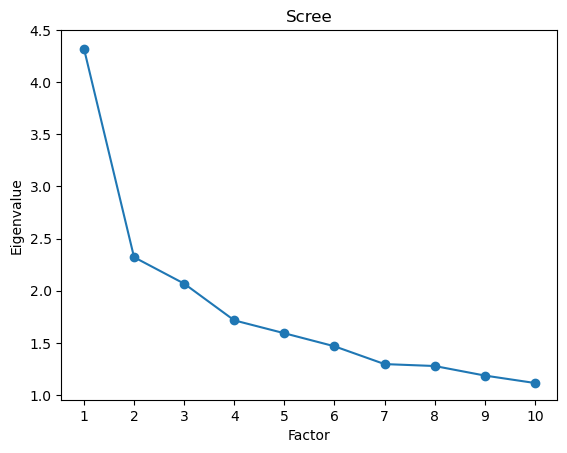

In [66]:
# Create a scree plot to visualize the explained variance by each principal component
# The plot helps to decide how many principal components to keep

# Plot the explained variance values for each of the 10 principal components as a line plot
plt.plot(range(10), pca.explained_variance_)

# Add scatter points on the line plot for better visualization
plt.scatter(range(10), pca.explained_variance_)

# Set the title of the plot to 'Scree'
plt.title('Scree')

# Label the x-axis as 'Factor'
plt.xlabel('Factor')

# Set the x-axis tick labels, starting from 1 up to 10 (corresponding to PC_1 to PC_10)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])

# Set the y-axis tick labels
plt.yticks([4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0], [4.5,4.0,3.5,3.0,2.5,2.0,1.5,1.0])

# Label the y-axis as 'Eigenvalue'
plt.ylabel('Eigenvalue')

In [67]:
# Perform Principal Component Analysis (PCA) on the standardized DataFrame
pca = PCA(n_components=2)

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Transform the scaled data to the new lower-dimensional representation
# The transformed data is stored in a new DataFrame
df_pca_standard = pd.DataFrame(pca.transform(df_scaled))

# Retrieve the loadings (components) for each principal component
# These loadings indicate how each feature in the original data contributes to the principal components
components = pca.components_

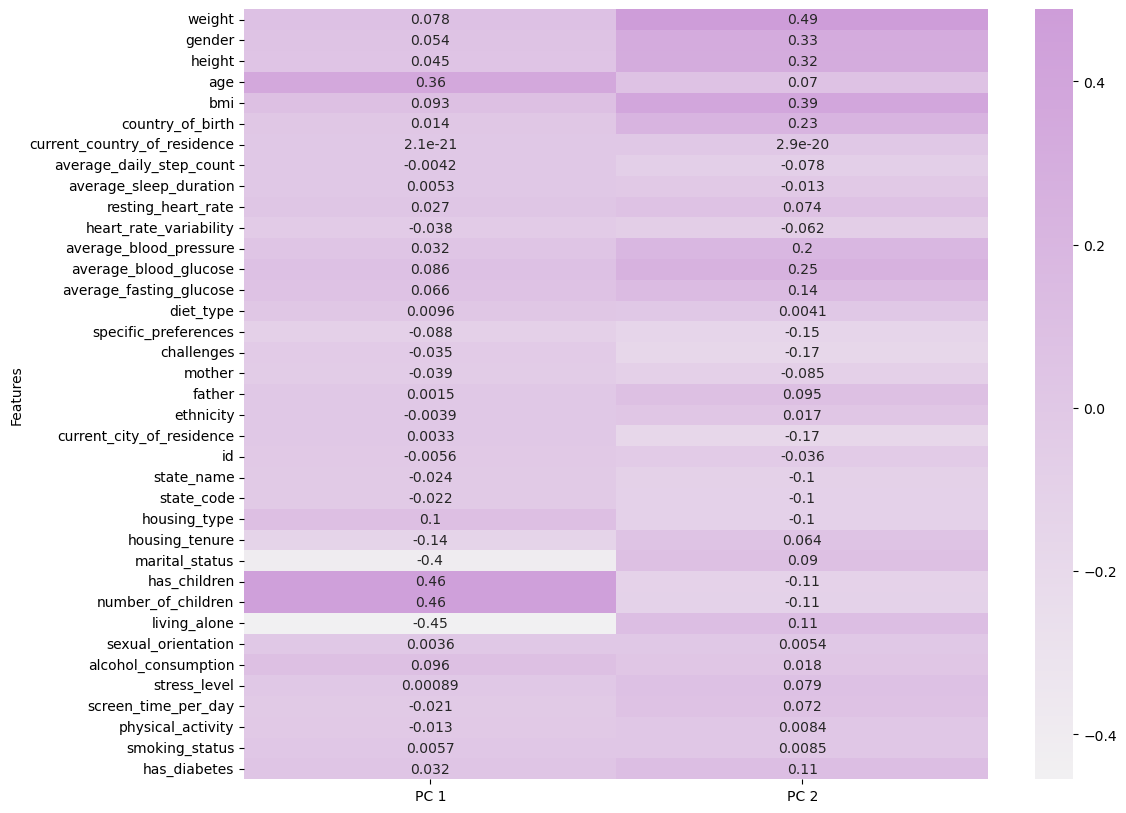

In [68]:
# Explore the correlations between the PCA dimensions and the scaled numerical features

# Get the number of original features that were input into PCA
num_pc = pca.n_features_in_

# Create a list of strings representing the names of the principal components ("PC 1", "PC 2", ...)
pc_list = ["PC "+str(i) for i in list(range(1, num_pc+1))]

# Create a DataFrame to store the component loadings
# The columns of the DataFrame correspond to the principal components, and the rows correspond to the original features
df_heatmap = pd.DataFrame.from_dict(dict(zip(pc_list, components)))

# Add a 'Features' column containing the names of the original features
df_heatmap['Features'] = df_scaled.columns.values

# Set 'Features' as the index for easier interpretation
df_heatmap = df_heatmap.set_index('Features')

# Initialize the plot with a specific figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Define a light color palette for the heatmap
light_pal = sns.light_palette('#CE9DD9', input='rgb', as_cmap=True)

# Create a heatmap using Seaborn to visualize the component loadings
# Annotations are added to each cell for better understanding
ax = sns.heatmap(df_heatmap, annot=True, cmap=light_pal)

# Display the heatmap
plt.show()


In [69]:
# Calculate and display the explained variance for each principal component
# The explained variance ratio indicates the proportion of the dataset's total variance that is 'explained' by each component

# Store the explained variance ratio for each principal component in a variable
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
print(f'Explained Variance of each component: {explained_variance}')

# Calculate the cumulative explained variance
# This shows how much of the dataset's total variance is explained as you add each additional principal component

# Use NumPy's cumsum function to calculate the cumulative sum of the explained variance ratios
cumulative_variance = np.cumsum(explained_variance)

# Print the cumulative explained variance
print(f'Cumulative Explained Variance: {cumulative_variance}')


Explained Variance of each component: [0.11999827 0.06443838]
Cumulative Explained Variance: [0.11999827 0.18443665]


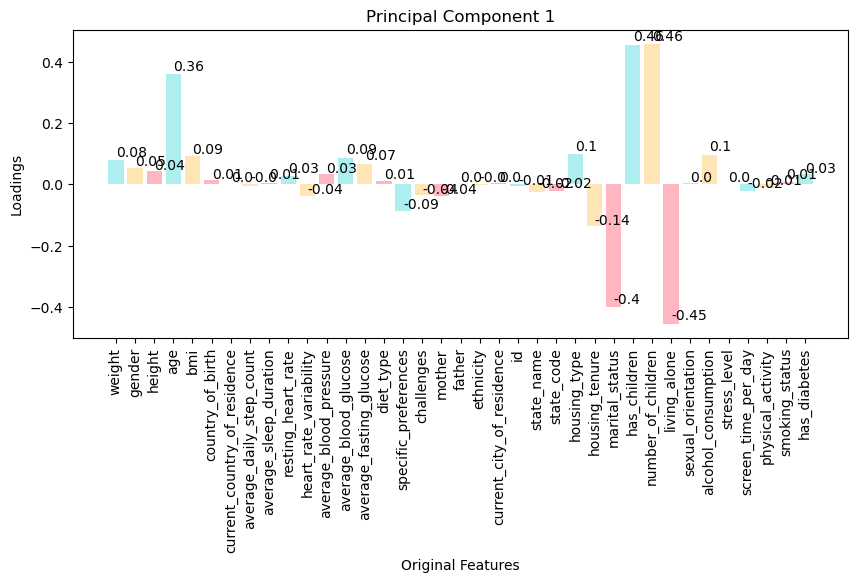

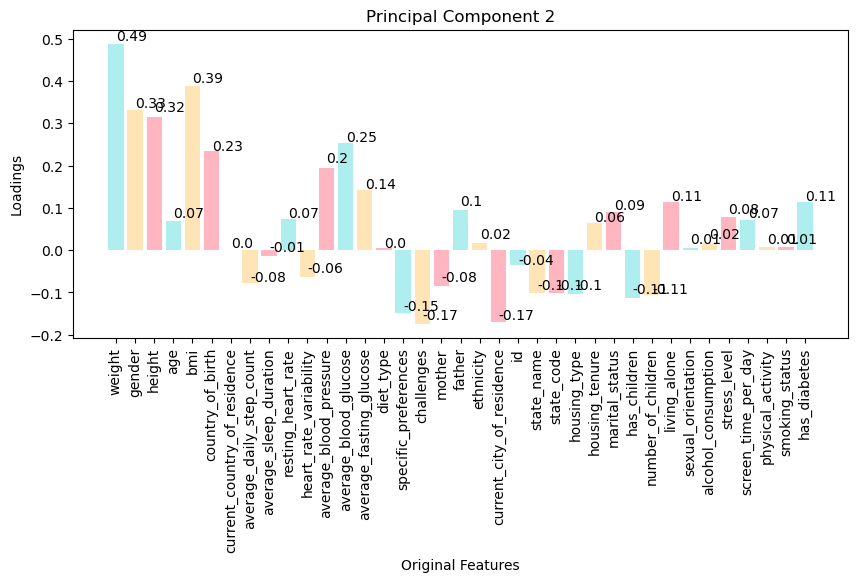

In [71]:
# Setup a pastel color palette for the bar charts
pastel_colors = ['paleturquoise', 'moccasin', 'lightpink']

# Get the number of principal components and the original feature names
n_pcs = pca.n_components_
features = df_descr_clean.columns

# Loop through each principal component to create individual bar charts
for i in range(n_pcs):
    # Initialize a new figure for each principal component
    plt.figure(figsize=(10, 4))

    # Create a bar chart showing how much each original feature contributes to the principal component
    # The heights of the bars represent the component loadings
    bars = plt.bar(features, components[i], color=pastel_colors)

    # Add numerical labels above each bar to indicate its height (loading value)
    for bar in bars:
        yval = round(bar.get_height(), 2)
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom')  # va: vertical alignment

    # Set the title and axis labels
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Original Features')
    plt.ylabel('Loadings')
    
    # Rotate x-axis labels to 90 degrees to make them more readable
    plt.xticks(rotation=90)
    
    # Display the plot
    plt.show()


In [72]:
# Perform PCA transformation and create a DataFrame with the reduced principal components

# Apply PCA transformation to the scaled data
# This generates a NumPy array of the data projected onto the first 'n' principal components (in this case, 5)
principalComponents_reduced = pca.fit_transform(df_scaled)

# Create a new DataFrame from the NumPy array of reduced principal components
# The columns are named 'PC1', 'PC2', 'PC3', 'PC4', and 'PC5' representing the first five principal components
df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=['PC1', 'PC2'])

# Show the DataFrame with the reduced components
df_reduced

,PC1,PC2
0,0.247558,2.664958
1,-0.027884,2.497547
2,-1.282709,-0.300301
3,-1.126576,-0.406603
4,2.924080,-2.057545
...,...,...
1427,-0.892555,-0.351412
1428,-0.580926,1.025895
1429,5.967774,-0.201178
1430,5.385930,1.526025


# ML Baseline

## RandomForest Classifier

In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target (y)
X = df_descr_clean.drop(['has_diabetes','average_fasting_glucose', 'average_blood_glucose', 'challenges', 'id'] , axis=1)
y = df_descr_clean['has_diabetes']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test, y_pred))


Accuracy: 0.89198606271777
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[256   0]
 [ 31   0]]
              precision    recall  f1-score   support

       False       0.89      1.00      0.94       256
        True       0.00      0.00      0.00        31

    accuracy                           0.89       287
   macro avg       0.45      0.50      0.47       287
weighted avg       0.80      0.89      0.84       287



/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [19]:
# Get feature importances from the trained model (for RandomForest, for example)
feature_importances = clf.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


age: 0.08291779091288162
bmi: 0.08176917546733006
height: 0.0695572733054669
resting_heart_rate: 0.06255777050284361
average_daily_step_count: 0.06231506164672644
weight: 0.06211850861523772
heart_rate_variability: 0.061587938381552326
average_sleep_duration: 0.056907045169315225
specific_preferences: 0.053730775654610305
current_city_of_residence: 0.05246806927381711
state_code: 0.041930100808631306
ethnicity: 0.041690106787547504
state_name: 0.032415713028364705
country_of_birth: 0.024613011361209663
diet_type: 0.0243730933723088
father: 0.023888024122891195
screen_time_per_day: 0.023278128656030645
mother: 0.022663781135310857
sexual_orientation: 0.02053646097171848
stress_level: 0.02052979651223015
average_blood_pressure: 0.017064753734871697
housing_type: 0.015457099622984883
gender: 0.012483105973537476
marital_status: 0.006589053607822755
alcohol_consumption: 0.0056472841402580055
living_alone: 0.004641840150821782
number_of_children: 0.0038704850742060574
physical_activity: 0.0

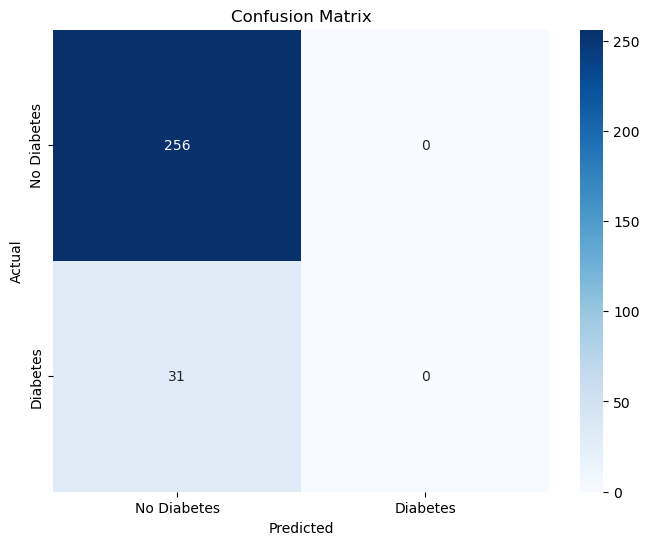

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have 'conf_matrix' from the previous code
plot_confusion_matrix(conf_matrix, labels=['No Diabetes', 'Diabetes'])


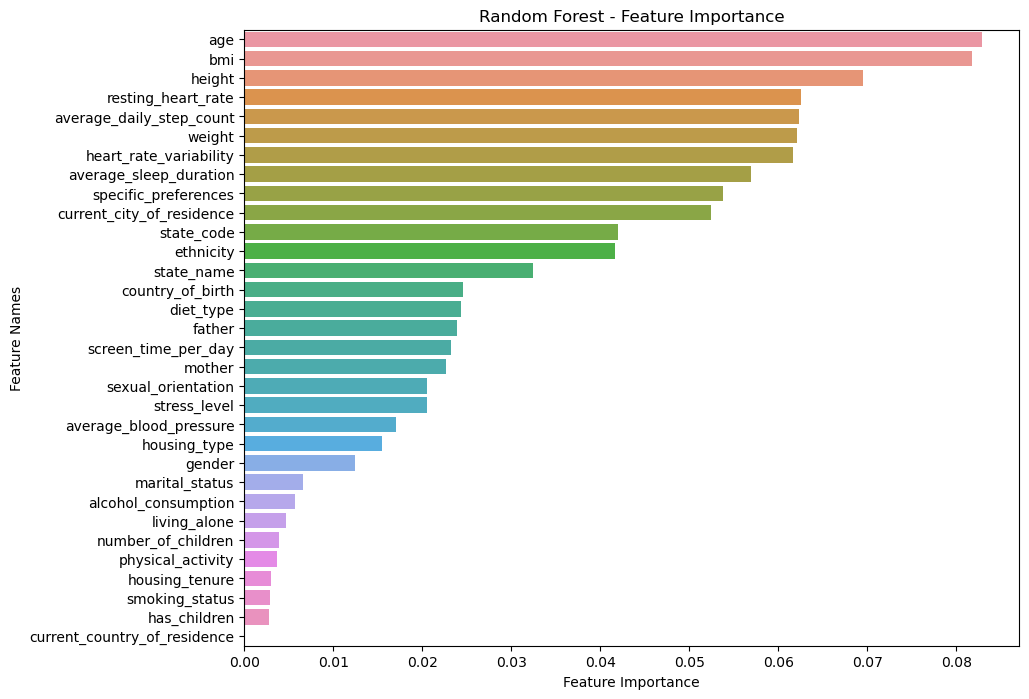

In [21]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    
# Assuming you have 'feature_importances' and 'X_train.columns' from the previous code
plot_feature_importance(feature_importances, X_train.columns, 'Random Forest')


## Neural network baseline

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initialize the neural network model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Add the output layer with a sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a binary cross-entropy loss and optimizer (e.g., Adam)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [24]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2 )


Epoch 1/50


2023-12-11 11:16:09.689776: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 0s 3ms/step - loss: 82.4445 - accuracy: 0.8395 - val_loss: 4.9403 - val_accuracy: 0.8865
Epoch 2/50
29/29 [==============================] - 0s 863us/step - loss: 6.6028 - accuracy: 0.7959 - val_loss: 4.1889 - val_accuracy: 0.8865
Epoch 3/50
29/29 [==============================] - 0s 759us/step - loss: 5.9833 - accuracy: 0.8100 - val_loss: 8.2393 - val_accuracy: 0.1528
Epoch 4/50
29/29 [==============================] - 0s 789us/step - loss: 5.4547 - accuracy: 0.7937 - val_loss: 3.5414 - val_accuracy: 0.8865
Epoch 5/50
29/29 [==============================] - 0s 798us/step - loss: 3.2214 - accuracy: 0.8221 - val_loss: 2.7102 - val_accuracy: 0.8865
Epoch 6/50
29/29 [==============================] - 0s 797us/step - loss: 2.3622 - accuracy: 0.8024 - val_loss: 9.7808 - val_accuracy: 0.8865
Epoch 7/50
29/29 [==============================] - 0s 813us/step - loss: 7.0768 - accuracy: 0.8090 - val_loss: 9.6031 - val_accuracy: 0.8865
Epoch 8/50
29/29 [

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


9/9 [==============================] - 0s 395us/step
Accuracy: 0.8606271777003485
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


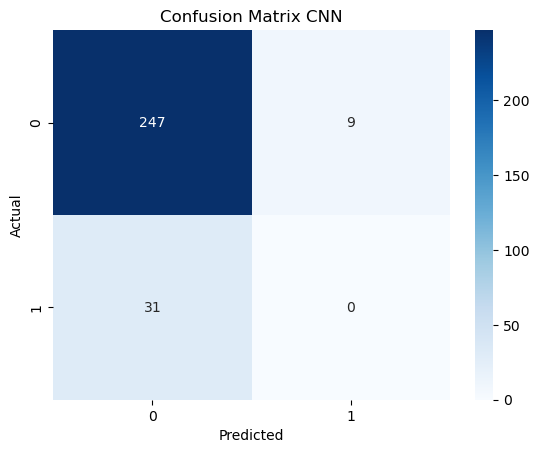

In [26]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix CNN')
plt.show()

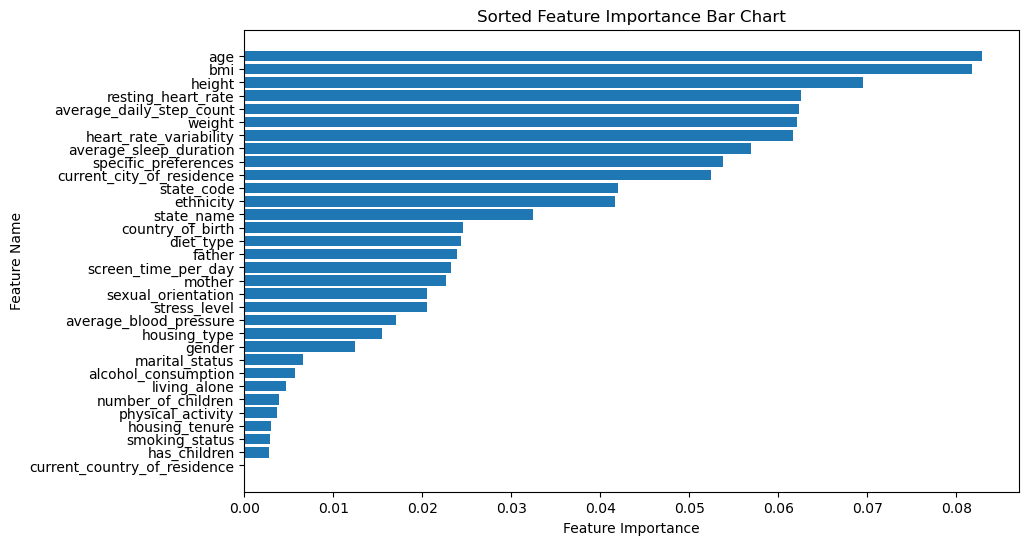

In [27]:
# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Pair feature names with their importance scores and sort them
sorted_features = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs
sorted_feature_names, sorted_importances = zip(*sorted_features)

# Create a bar chart of sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Sorted Feature Importance Bar Chart')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

### Better CNN

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Initialize the neural network model
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers with dropout and batch normalization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

# Add the output layer with a sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a binary cross-entropy loss and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model on the training data
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping, reduce_lr])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])


Epoch 1/50
29/29 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.5262 - val_loss: 16.4808 - val_accuracy: 0.1135 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 0s 1ms/step - loss: 0.6549 - accuracy: 0.6343 - val_loss: 5.5769 - val_accuracy: 0.1135 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7325 - val_loss: 0.7914 - val_accuracy: 0.2576 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 0s 998us/step - loss: 0.5404 - accuracy: 0.7598 - val_loss: 2.9050 - val_accuracy: 0.1135 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 0s 976us/step - loss: 0.4806 - accuracy: 0.8188 - val_loss: 0.5154 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 0s 988us/step - loss: 0.4413 - accuracy: 0.8526 - val_loss: 0.5017 - val_accuracy: 0.8865 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 0s 1ms/step - loss: 0.4

In [41]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

9/9 [==============================] - 0s 378us/step
Accuracy: 0.89198606271777
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[256   0]
 [ 31   0]]


/Users/jonathanpoulsen/anaconda3/envs/tf_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


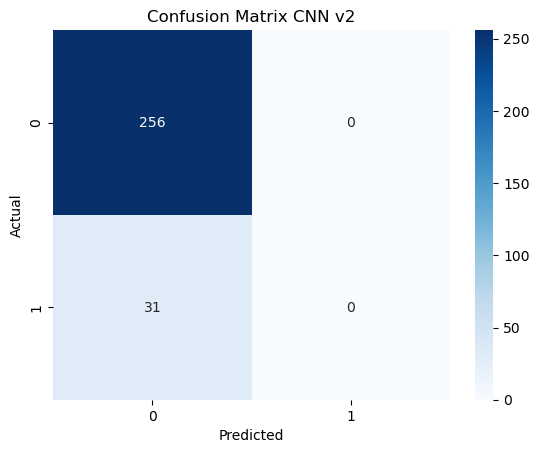

In [42]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix CNN v2')
plt.show()

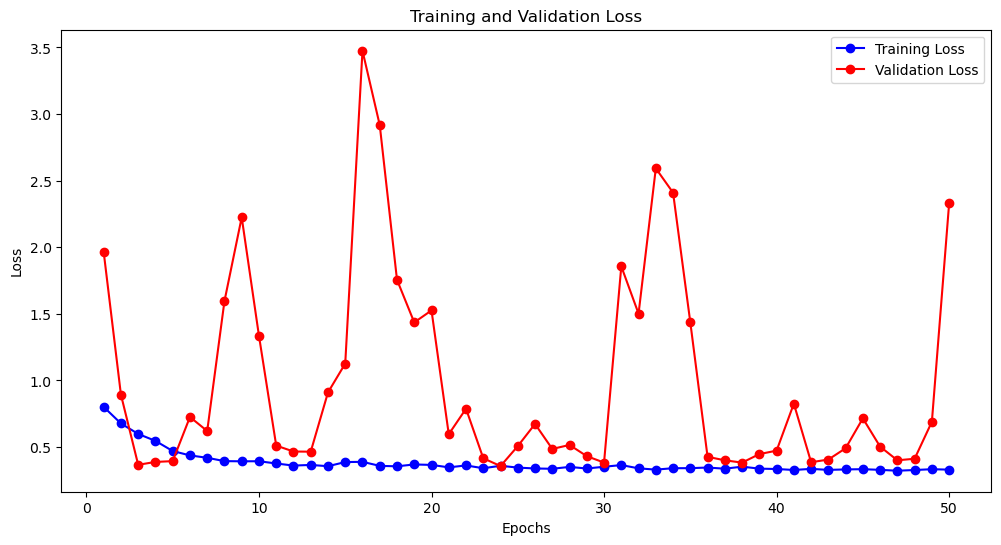

In [39]:
import matplotlib.pyplot as plt

# Assuming 'model.fit' was assigned to a variable named 'history'
# For example: history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the loss curve
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Improve dataset

In [113]:
df_descr_syn = pd.read_csv('descriptives_cleaned.csv')

### Adding new columns

In [115]:
# Adding physical activity level as a whole number
df_descr_syn['physical_activity_level'] = np.random.randint(0, 30, size=len(df_descr_syn))
# Whole number between 0 and 30

# Adding dietary fiber intake as a whole number
df_descr_syn['fiber_intake'] = np.random.randint(10, 40, size=len(df_descr_syn))
# Whole number between 10 and 40

# Adding body fat percentage with one decimal place
df_descr_syn['body_fat_percentage'] = np.random.normal(loc=25, scale=5, size=len(df_descr_syn))
df_descr_syn['body_fat_percentage'] = df_descr_syn['body_fat_percentage'].apply(lambda x: round(x, 1))
# Decimal number with one decimal place

# Assuming a numerical value representing the frequency of urination
df_descr_syn['urination_frequency'] = np.random.randint(1, 11, size=len(df_descr_syn))

# Assuming a numerical value representing the level of fatigue
df_descr_syn['fatigue_level'] = np.random.randint(1, 11, size=len(df_descr_syn))


# Assuming a correlation between the new features and the target variable 'has_diabetes'
# You can adjust these correlations based on your domain knowledge or specific dataset characteristics

# Simulating a negative correlation between physical activity and diabetes
df_descr_syn.loc[df_descr_syn['physical_activity_level'] > 15, 'has_diabetes'] = np.random.choice([1, 0, 0, 0], size=(df_descr_syn['physical_activity_level'] > 15).sum())

# Simulating a negative correlation between dietary fiber intake and diabetes
df_descr_syn.loc[df_descr_syn['fiber_intake'] > 25, 'has_diabetes'] = np.random.choice([1, 0, 0, 0], size=(df_descr_syn['fiber_intake'] > 25).sum())

# Simulating a positive correlation between body fat percentage and diabetes
df_descr_syn.loc[df_descr_syn['body_fat_percentage'] > 30, 'has_diabetes'] = np.random.choice([1, 1, 1, 0], size=(df_descr_syn['body_fat_percentage'] > 30).sum())

# Simulating a positive correlation between urination frequency and diabetes
df_descr_syn.loc[df_descr_syn['urination_frequency'] > 7, 'has_diabetes'] = np.random.choice([1, 1, 1, 0], size=(df_descr_syn['urination_frequency'] > 7).sum())

# Simulating a positive correlation between fatigue level and diabetes
df_descr_syn.loc[df_descr_syn['fatigue_level'] > 7, 'has_diabetes'] = np.random.choice([1, 1, 1, 0], size=(df_descr_syn['fatigue_level'] > 7).sum())


In [125]:
df_descr_syn.head()

,weight,gender,height,age,bmi,country_of_birth,current_country_of_residence,average_daily_step_count,average_sleep_duration,resting_heart_rate,...,stress_level,screen_time_per_day,physical_activity,smoking_status,has_diabetes,physical_activity_level,fiber_intake,body_fat_percentage,urination_frequency,fatigue_level
0,70.00,0,152,16,30.42,33,0,7987,7.0,55,...,0.5,3.0,1.0,0,0,26,39,32.7,4,7
1,84.90,1,155,25,26.80,20,0,7986,6.9,50,...,0.0,3.0,1.0,0,0,12,29,28.1,7,9
2,82.00,0,146,16,22.57,33,0,7482,6.6,54,...,0.5,4.0,1.0,0,0,7,25,29.1,4,7
3,67.13,0,149,17,23.68,33,0,7834,6.5,56,...,0.5,3.0,1.0,0,0,15,28,29.0,5,4
4,53.00,0,141,20,24.69,3,0,7987,6.5,55,...,0.5,4.0,1.0,0,1,16,21,27.0,8,2


In [120]:
df_descr_syn['has_diabetes'] = df_descr_syn['has_diabetes'].astype(int)

df_descr_syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   weight                        1432 non-null   float64
 1   gender                        1432 non-null   int64  
 2   height                        1432 non-null   int64  
 3   age                           1432 non-null   int64  
 4   bmi                           1432 non-null   float64
 5   country_of_birth              1432 non-null   int64  
 6   current_country_of_residence  1432 non-null   int64  
 7   average_daily_step_count      1432 non-null   int64  
 8   average_sleep_duration        1432 non-null   float64
 9   resting_heart_rate            1432 non-null   int64  
 10  heart_rate_variability        1432 non-null   float64
 11  average_blood_pressure        1432 non-null   int64  
 12  average_blood_glucose         1432 non-null   int64  
 13  ave

## Models on improved data

In [98]:
df_descr_syn = pd.read_csv('descriptives_synthetic.csv')

### RandomForest

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target (y)
X_syn = df_descr_syn.drop(['has_diabetes','average_fasting_glucose', 'average_blood_glucose', 'challenges', 'id'] , axis=1)
y_syn = df_descr_syn['has_diabetes']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train_syn, y_train_syn)


RandomForestClassifier(random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred_syn = clf.predict(X_test_syn)

# Evaluate the model
accuracy = accuracy_score(y_test_syn, y_pred_syn)
precision = precision_score(y_test_syn, y_pred_syn)
recall = recall_score(y_test_syn, y_pred_syn)
f1 = f1_score(y_test_syn, y_pred_syn)
conf_matrix = confusion_matrix(y_test_syn, y_pred_syn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print(classification_report(y_test_syn, y_pred_syn))


Accuracy: 0.7700348432055749
Precision: 0.7342657342657343
Recall: 0.7894736842105263
F1 Score: 0.7608695652173912
Confusion Matrix:
 [[116  38]
 [ 28 105]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       154
           1       0.73      0.79      0.76       133

    accuracy                           0.77       287
   macro avg       0.77      0.77      0.77       287
weighted avg       0.77      0.77      0.77       287



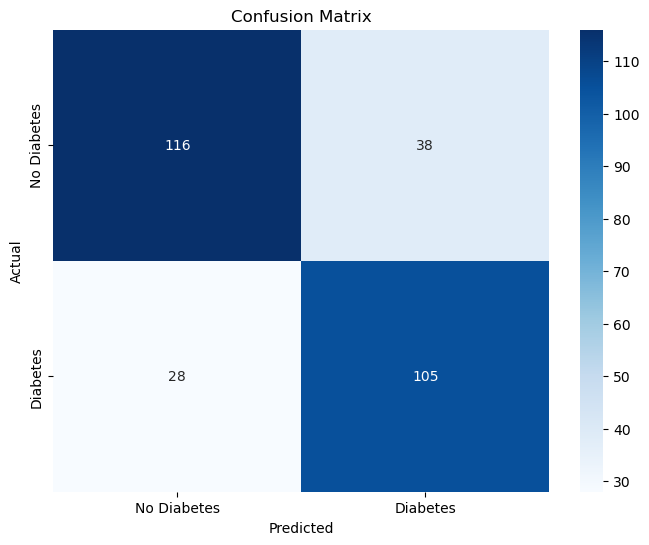

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have 'conf_matrix' from the previous code
plot_confusion_matrix(conf_matrix, labels=['No Diabetes', 'Diabetes'])


In [8]:
# Get feature importances from the trained model (for RandomForest, for example)
feature_importances = clf.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X_train_syn.columns, feature_importances))

# Sort features by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


fatigue_level: 0.12388694268047762
urination_frequency: 0.1131381595955268
body_fat_percentage: 0.08469054105376614
bmi: 0.04673189229964126
average_daily_step_count: 0.046053032436256185
weight: 0.04406142440071235
fiber_intake: 0.04124098180188845
height: 0.038822714884793046
physical_activity_level: 0.03843491826537208
age: 0.03724733860410605
resting_heart_rate: 0.03684615035350466
heart_rate_variability: 0.03429609723266057
average_sleep_duration: 0.03368910669941755
current_city_of_residence: 0.03186045736157267
specific_preferences: 0.031041009499145684
state_name: 0.025462570573672773
ethnicity: 0.0249153466067833
state_code: 0.02222869880105356
father: 0.018055483264848547
diet_type: 0.017978145846123287
mother: 0.017751265002713124
country_of_birth: 0.016186585071106187
screen_time_per_day: 0.01465927486381642
average_blood_pressure: 0.010383713070557046
sexual_orientation: 0.010052520471102236
stress_level: 0.007608997244996671
housing_type: 0.006742399144050207
gender: 0.00

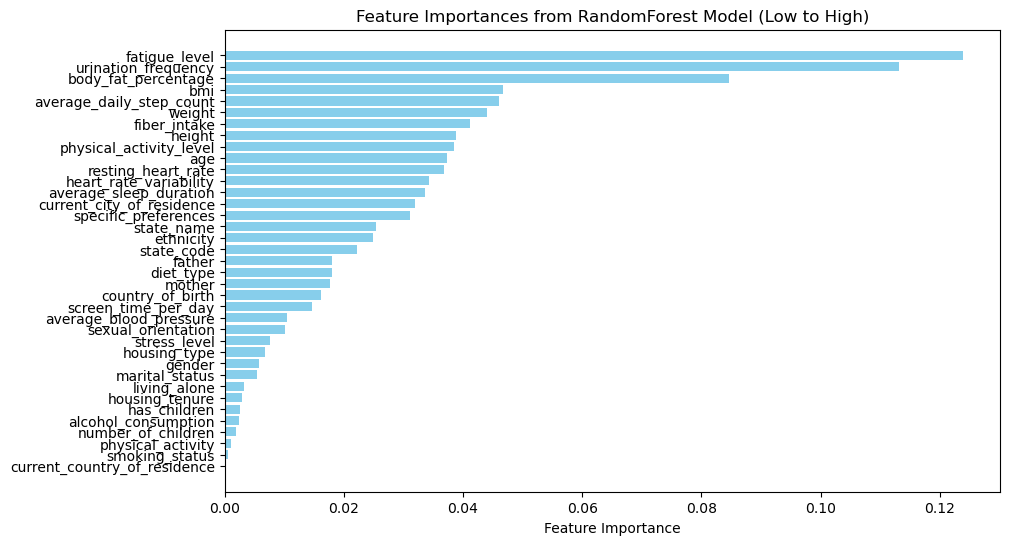

In [9]:
import matplotlib.pyplot as plt

# Assuming 'sorted_feature_importance' is a list of tuples containing (feature, importance)
features, importances = zip(*sorted_feature_importance)

# Reverse the order
features = features[::-1]
importances = importances[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center', color='skyblue')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForest Model (Low to High)')
plt.show()


### CNN with new data

In [99]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target (y)
X_syn = df_descr_syn.drop(['has_diabetes', 'average_fasting_glucose', 'average_blood_glucose', 'challenges', 'id'], axis=1)
y_syn = df_descr_syn['has_diabetes']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.2, random_state=42)


In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential()
model.add(layers.Input(shape=(X_train_syn.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [101]:
X_train_syn['living_alone'] = X_train_syn['living_alone'].astype(int)
X_train_syn = X_train_syn.astype(float)  # Convert all columns to float



In [102]:

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


# Train the model on the training data
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping, reduce_lr])
history = model.fit(X_train_syn, y_train_syn, epochs=100, batch_size=8, validation_split=0.2, callbacks=[reduce_lr, early_stopping])


Epoch 1/100
115/115 [==============================] - 0s 1ms/step - loss: 1.0676 - accuracy: 0.4978 - val_loss: 1.9265 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 2/100
115/115 [==============================] - 0s 628us/step - loss: 0.9046 - accuracy: 0.5044 - val_loss: 0.9742 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 3/100
115/115 [==============================] - 0s 614us/step - loss: 0.8090 - accuracy: 0.5426 - val_loss: 0.8547 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 4/100
115/115 [==============================] - 0s 614us/step - loss: 0.8031 - accuracy: 0.5055 - val_loss: 0.6929 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 5/100
115/115 [==============================] - 0s 598us/step - loss: 0.7880 - accuracy: 0.5426 - val_loss: 0.8201 - val_accuracy: 0.4192 - lr: 0.0010
Epoch 6/100
115/115 [==============================] - 0s 603us/step - loss: 0.7785 - accuracy: 0.5022 - val_loss: 1.0297 - val_accuracy: 0.4148 - lr: 0.0010
Epoch 7/100
115/115 [==============================] -

In [103]:
print(X_test_syn.dtypes)
X_test_syn = X_test_syn.astype(float)  # Convert all columns to float



weight                          float64
gender                            int64
height                            int64
age                               int64
bmi                             float64
country_of_birth                  int64
current_country_of_residence      int64
average_daily_step_count          int64
average_sleep_duration          float64
resting_heart_rate                int64
heart_rate_variability          float64
average_blood_pressure            int64
diet_type                         int64
specific_preferences              int64
mother                            int64
father                            int64
ethnicity                         int64
current_city_of_residence         int64
state_name                        int64
state_code                        int64
housing_type                      int64
housing_tenure                    int64
marital_status                    int64
has_children                      int64
number_of_children              float64


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Make predictions on the test data
y_pred_syn = model.predict(X_test_syn)
y_pred_syn = (y_pred > 0.5).astype("int32")

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test_syn, y_pred_syn)
precision = precision_score(y_test_syn, y_pred_syn)
recall = recall_score(y_test_syn, y_pred_syn)
f1 = f1_score(y_test_syn, y_pred_syn)
conf_matrix = confusion_matrix(y_test_syn, y_pred_syn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

9/9 [==============================] - 0s 389us/step
Accuracy: 0.5853658536585366
Precision: 0.5388888888888889
Recall: 0.7293233082706767
F1 Score: 0.6198083067092651
Confusion Matrix:
 [[71 83]
 [36 97]]


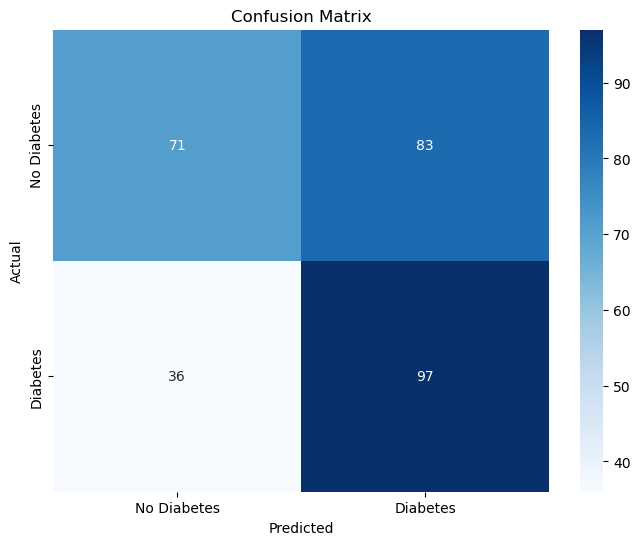

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have 'conf_matrix' from the previous code
plot_confusion_matrix(conf_matrix, labels=['No Diabetes', 'Diabetes'])

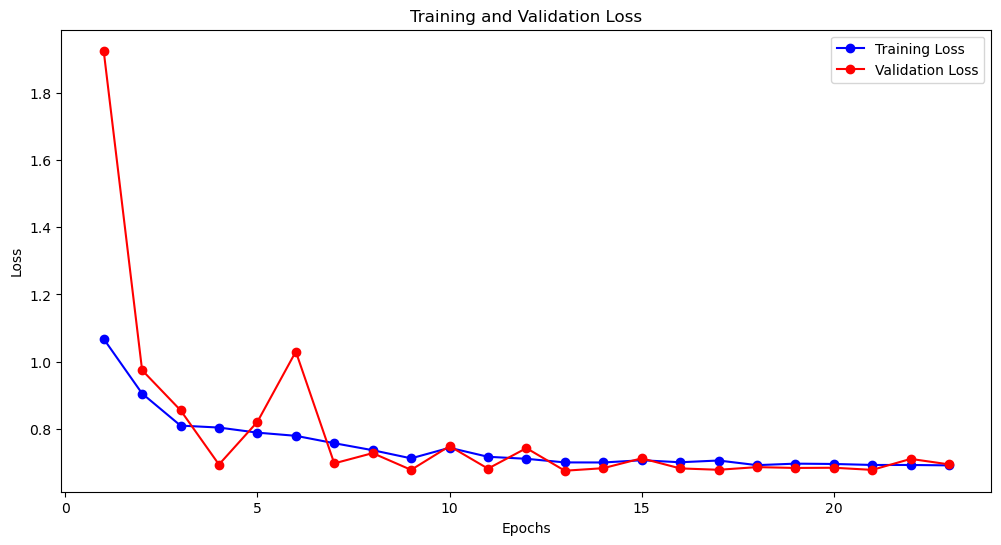

In [106]:
import matplotlib.pyplot as plt

# Assuming 'model.fit' was assigned to a variable named 'history'
# For example: history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the loss curve
plt.figure(figsize=(12, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

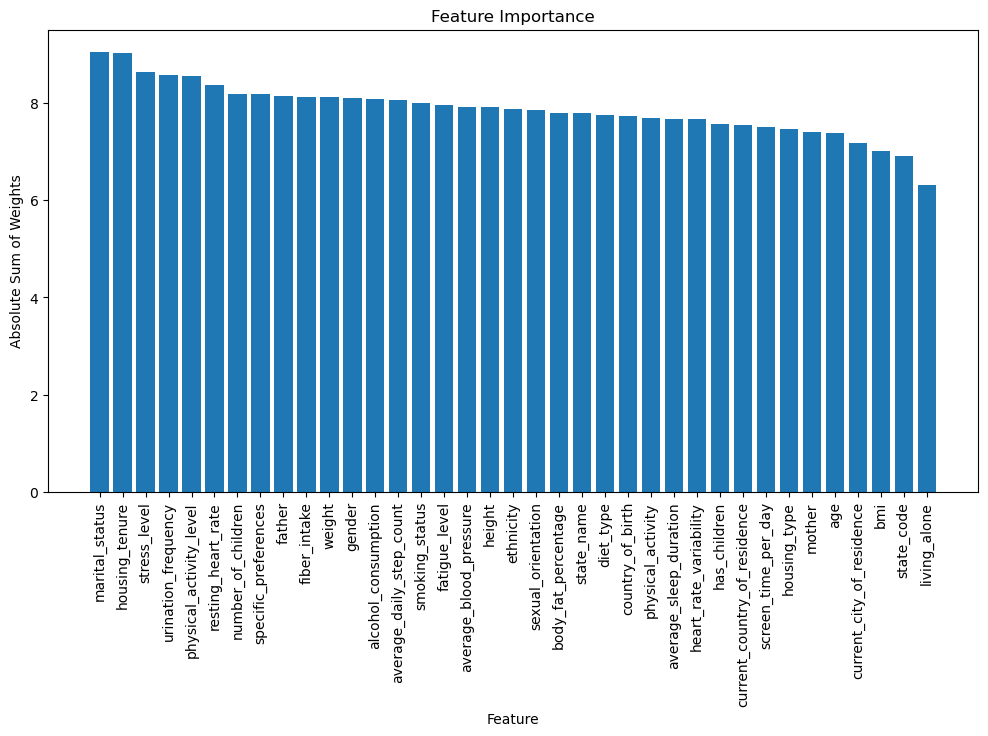

In [107]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance as the absolute sum of weights for each feature
feature_importance = np.abs(weights).sum(axis=1)

# Get the feature names
feature_names = X_train_syn.columns

# Sort the features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Sum of Weights')
plt.title('Feature Importance')
plt.show()
